In [ ]:
# Larval Zebra Fish
# Neurons visualization
# 2D whole brain colored plots
# Connectivity matrix of splitted 2D grid

In [1]:
# Installing neurom
import numpy as np
import matplotlib.pyplot as plt
import os

!pip install neurom
import neurom as nm
from neurom.view.matplotlib_impl import plot_morph

def figure():
    fig, ax = plt.subplots(figsize=[6, 8], sharex=True, sharey=True)
    ax.set_aspect('equal')
    ax.axis("off")
    plt.gca().invert_yaxis()

    return fig, ax

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 6.8 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for morphio>=3.3.6 from https://files.pythonhosted.org/packages/7c/54/20dff6aaf2eaaf1545504ee55e212e52b1e85613c2fc5dd5930acb886a23/MorphIO-3.3.7-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.3 MB/s eta 0:00:00 0:00:01m
  Created wheel for neurom: filename=neurom-3.2.5-py3-none-any.whl size=106076 sha256=d745be512b7d63f9d94d47e172c11d599e20eb6b3957a09d916857d3a4cf79ea
  Stored in directory: /Users/alindumitru/Library/Caches/pip/wheels/09/08/15/996e07437d0fc76c34fe34065f1658ac0e3d8af668a40b476f
Successfully built neurom


In [4]:
# provide path to the data folder
folder_path = "./Aligned/Original"

In [5]:
# Filtering and loading the data
# Filtering
neuron_paths = []
for file in os.listdir(folder_path):
    neuron_path = folder_path + '/' + file

    try:
        m = nm.load_morphology(neuron_path) # try to load the morphology
        neuron_paths.append(neuron_path) # if this works appened the path to neuron_paths
    except:
        pass # otherwise just skip this neuron

print("Loaded " + str(len(neuron_paths)) + " of " + str(len(os.listdir(folder_path))) + " neurons.")


./Aligned/Original/FT_T_maG_7.swc:2462:warning

./Aligned/Original/FT_T_maG_7.swc:2461:warning

./Aligned/Original/FT_T_maG_7.swc:2460:warning

./Aligned/Original/FT_T_maG_7.swc:2459:warning

./Aligned/Original/FT_T_maG_7.swc:2458:warning

./Aligned/Original/FT_T_maG_7.swc:2457:warning

./Aligned/Original/FT_T_maG_7.swc:2456:warning

./Aligned/Original/FT_T_maG_7.swc:2455:warning

./Aligned/Original/FT_T_maG_7.swc:2454:warning

./Aligned/Original/FT_T_maG_7.swc:2453:warning

./Aligned/Original/FT_T_maG_7.swc:2452:warning

./Aligned/Original/FT_T_maG_7.swc:2451:warning

./Aligned/Original/FT_T_maG_7.swc:2450:warning

./Aligned/Original/FT_T_maG_7.swc:2449:warning

./Aligned/Original/FT_T_maG_7.swc:2448:warning

./Aligned/Original/FT_T_maG_7.swc:2447:warning

./Aligned/Original/FT_T_maG_7.swc:2446:warning

./Aligned/Original/FT_T_maG_7.swc:2445:warning

./Aligned/Original/FT_T_maG_7.swc:2444:warning

./Aligned/Original/FT_T_maG_7.swc:2443:warning

./Aligned/Original/FT_T_maG_7.swc:2442:

Loaded 3175 of 4327 neurons.


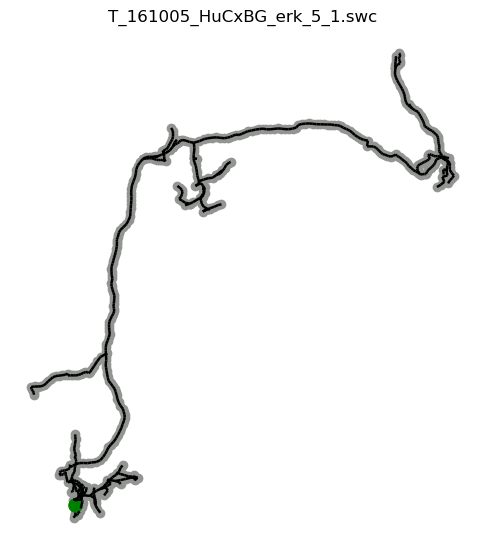

In [11]:
# Plotting a Neuron in 2D
# Plotting single neurons in 2d
n = np.random.randint(low=0, high=len(neuron_paths)) # sample a random neuron
m = nm.load_morphology(neuron_paths[n]) # load it's morphology

fig, ax = figure()
plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(m.points[:,0], m.points[:,1], color='xkcd:grey')
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

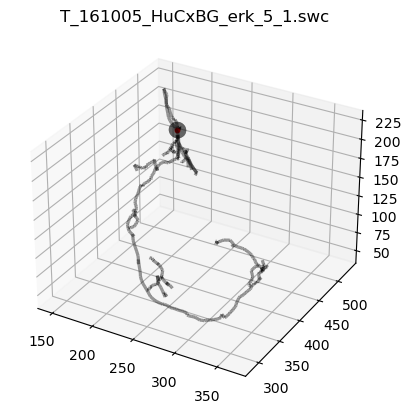

In [14]:
# Plotting a Neuron in 3D
# Plotting single neurons in 3d
from neurom.view.matplotlib_impl import plot_morph3d

fig = plt.figure()
ax = plt.axes(projection='3d')
plot_morph3d(m, ax=ax, color='k', alpha=0.4, diameter_scale=None, linewidth=2.3)
ax.scatter(m.soma.center[0], m.soma.center[1], m.soma.center[2], s=10, color='r')

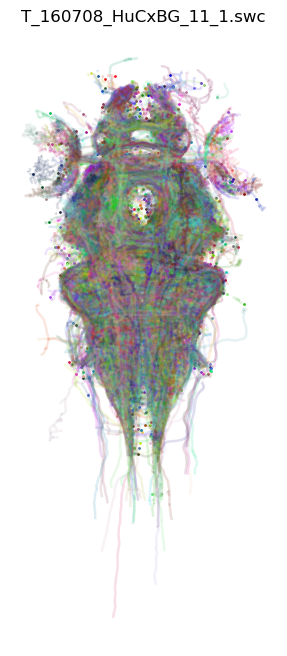

In [16]:
# Plotting the brain in 2D
import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Plot all of the neurons together
fig, ax = figure()
for i, path in enumerate(neuron_paths):
  currentPath = path
  m = nm.load_morphology(currentPath) # load it's morphology

  try:
    color = random_color()
    plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, color=color, linewidth=1.8, alpha=0.15)
    #plt.scatter(m.points[:,0], m.points[:,1], color=color)
    plt.scatter(m.soma.center[0], m.soma.center[1], s=1, color=color)
  except ValueError as e:
    print(f"An error occurred with neuron: {e}")
    # Skip this neuron and continue with the next
    pass

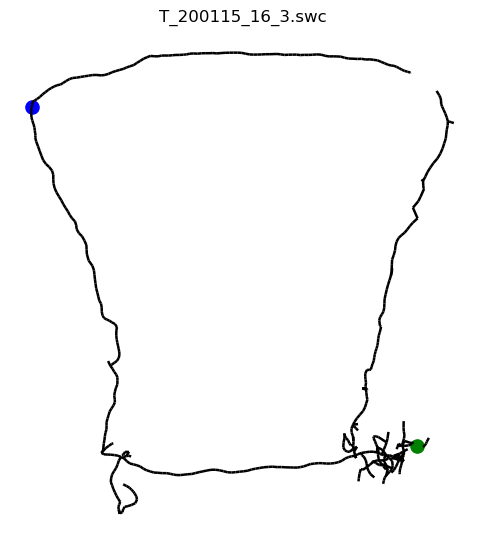

In [17]:
# Input to output neuron (soma to furthest)
# Define the output point for a single neuron
n = np.random.randint(low=0, high=len(neuron_paths))
m = nm.load_morphology(neuron_paths[n])

import math

def distance_3d(point1, point2):
    return math.sqrt((point2[0] - point1[0])**2 + (point2[1] - point1[1])**2 + (point2[2] - point1[2])**2)

max_distance = float("-inf")
max_output = m.soma.center

for point in m.points:
  distance = distance_3d(point, m.soma.center)
  if (distance > max_distance):
    max_distance = distance
    max_output = point

# Check that this seems to work by plotting some data
fig, ax = figure()
plot_morph(m,ax=ax, soma_outline=0, plane='xy', diameter_scale=None, linewidth=1.8, color='k', alpha=1.0)
plt.scatter(max_output[0], max_output[1], s=90, color='b')
plt.scatter(m.soma.center[0], m.soma.center[1], s=90, color='g')

In [18]:
# Calculate inputs / outputs lists
# Define each neurons input and output point
inputs, outputs = [], []

for i, path in enumerate(neuron_paths):
  try:
    currentPath = path
    m = nm.load_morphology(currentPath) # load it's morphology

    max_distance = float("-inf")
    max_output = m.soma.center

    for point in m.points:
      distance = distance_3d(point, m.soma.center)
      if (distance > max_distance):
        max_distance = distance
        max_output = point

    inputs.append(m.soma.center)
    outputs.append(max_output)
  except:
    pass

assert len(inputs) == len(outputs)
# Use an assert statement at the end of your code

[array([274.15982, 732.6134 , 247.18036], dtype=float32), array([312.33282, 506.3576 , 319.65515], dtype=float32), array([125.98356, 507.08362, 267.0553 ], dtype=float32), array([233.15324, 490.9825 , 286.71497], dtype=float32), array([297.73666, 884.5894 , 255.07442], dtype=float32), array([273.64914, 729.4874 , 257.715  ], dtype=float32), array([396.226  , 515.5493 , 289.83157], dtype=float32), array([396.34134, 692.3886 , 195.12224], dtype=float32), array([421.53104, 502.4824 , 285.07986], dtype=float32), array([379.5525, 489.2094, 286.8838], dtype=float32), array([175.29594, 461.40842, 230.05493], dtype=float32), array([298.7775 , 385.06445, 269.45892], dtype=float32), array([428.46494, 536.4521 , 210.71294], dtype=float32), array([432.46124, 471.93552, 186.9596 ], dtype=float32), array([294.6966  , 107.958885, 142.35135 ], dtype=float32), array([292.03552, 516.4891 , 254.20648], dtype=float32), array([378.74716, 479.746  ,  82.85783], dtype=float32), array([235.71474, 504.18744, 2

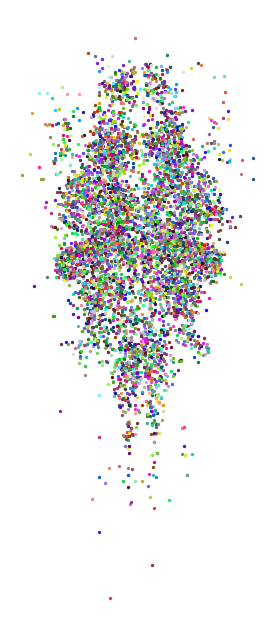

In [19]:
# Draw input / output as points
import random

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# Plot all of the neurons together in line form (input-output point)
fig, ax = figure()

for i, v in enumerate(inputs):
  p1 = inputs[i]
  p2 = outputs[i]
  # Define your points
  point1 = (p1[0], p1[1], p1[2])
  point2 = (p2[0], p2[1], p2[2])
  color = random_color()

  # Draw a line between point1 and point2
  #ax.plot([point1[0], point2[0]], [point1[1], point2[1]], color=color, linewidth=0.5)

  # Optionally, you can add markers for the points themselves
  ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=color, s=2)


250


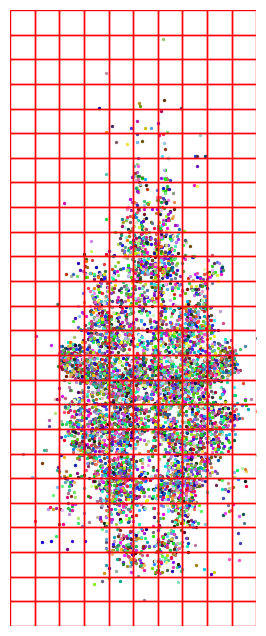

In [20]:
# Divide the brain into a 2d grid, plot whole brain and then the 2D grid on top
# At the same time calculate connectivity matrix, where each value signifies a connection between input
# and output
import numpy as np
import random
import matplotlib.patches as patches

def random_color():
  return "#{:06x}".format(random.randint(0, 0xFFFFFF))

# think about cell size
cell_size = 50

max_X = float("-inf")
max_Y = float("-inf")
max_Z = float("-inf")

# find maximum for each dimension to know the size of the grid
for i, v in enumerate(inputs):
  input = inputs[i]
  output = outputs[i]
  if input[0] > max_X:
    max_X = input[0]
  if input[1] > max_Y:
    max_Y = input[1]
  if input[2] > max_Z:
    max_Z = input[2]

  if output[0] > max_X:
    max_X = output[0]
  if output[1] > max_Y:
    max_Y = output[1]
  if output[2] > max_Z:
    max_Z = output[2]

x_dim = int(max_X / cell_size) # for instance, 52 cells of size 10
y_dim = int(max_Y / cell_size)
z_dim = int(max_Z / cell_size)

twoDBrain = np.zeros((x_dim, y_dim, z_dim))

num_voxels = x_dim * y_dim
print(num_voxels)
connectivityMatrix = np.zeros((num_voxels, num_voxels))

def voxel_to_index(x, y, x_dim):
    return y * x_dim + x

for i, v in enumerate(inputs):
  input = inputs[i]
  output = outputs[i]

  i_x = int(input[0]/cell_size) - 1
  i_y = int(input[1]/cell_size) - 1
  i_z = int(input[2]/cell_size) - 1

  twoDBrain[i_x, i_y, i_z] += 1

  o_x = int(output[0]/cell_size) - 1
  o_y = int(output[1]/cell_size) - 1
  o_z = int(output[2]/cell_size) - 1

  twoDBrain[o_x, o_y, o_z] += 1

  input_idx = voxel_to_index(i_x, i_y, x_dim)
  output_idx = voxel_to_index(o_x, o_y, x_dim)

  connectivityMatrix[input_idx][output_idx] += 1

fig, ax = figure()

# draw the input,output so we can overlap over the cells
for i, v in enumerate(inputs):
  p1 = inputs[i]
  p2 = outputs[i]
  # Define your points
  point1 = (p1[0], p1[1], p1[2])  # Replace with your point1 coordinates
  point2 = (p2[0], p2[1], p2[2])  # Replace with your point2 coordinates
  color = random_color()

  # Optionally, you can add markers for the points themselves
  ax.scatter([point1[0], point2[0]], [point1[1], point2[1]], color=color, s=2)

# Iterate over the range of the dimensions
for i in range(x_dim):
    for j in range(y_dim):
        # Calculate the bottom-left corner of each cell
        lower_left_x = i * cell_size
        lower_left_y = j * cell_size

        # Create a rectangle
        rect = patches.Rectangle((lower_left_x, lower_left_y), cell_size, cell_size, linewidth=1, edgecolor='r', facecolor='none')

        # Add the rectangle to the plot
        ax.add_patch(rect)

# Set the limits of the axes based on the grid size
ax.set_xlim(0, x_dim * cell_size)
ax.set_ylim(0, y_dim * cell_size)

# Set labels for the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

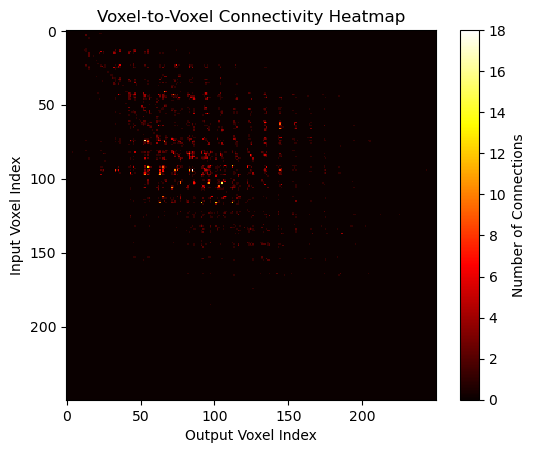

In [21]:
# Plot the connectivity map as a heat map
#Create a figure and axis
fig, ax = plt.subplots()

# Create the heatmap
cax = ax.imshow(connectivityMatrix, cmap='hot', interpolation='nearest')

# Add a color bar
cbar = fig.colorbar(cax)
cbar.set_label('Number of Connections')

# Add labels and title (optional)
ax.set_xlabel('Output Voxel Index')
ax.set_ylabel('Input Voxel Index')
ax.set_title('Voxel-to-Voxel Connectivity Heatmap')

# Show the plot
plt.show()